<a href="https://colab.research.google.com/github/tushar2k/Sem-V-labs/blob/master/DL-%20ECSE440L/DL_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras import layers
from keras.datasets import mnist
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.layers import *
from keras.optimizers import SGD
import PIL
import PIL.Image
import tensorflow as tf
from os import listdir
import cv2
from sklearn.model_selection import train_test_split

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip
!unzip -q DevanagariHandwrittenCharacterDataset

--2020-09-24 19:05:40--  https://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80417803 (77M) [application/x-httpd-php]
Saving to: ‘DevanagariHandwrittenCharacterDataset.zip’

DevanagariHandwritt 100%[===================>]  76.69M  20.1MB/s    in 4.8s    

2020-09-24 19:05:45 (15.9 MB/s) - ‘DevanagariHandwrittenCharacterDataset.zip’ saved [80417803/80417803]



In [3]:
# cd /content/DevanagariHandwrittenCharacterDataset/Train/

In [4]:
imroot=listdir('/content/DevanagariHandwrittenCharacterDataset/Train')

In [5]:
imroot=list(i for i in imroot if ('digit' in i))
imroot

['digit_1',
 'digit_9',
 'digit_2',
 'digit_7',
 'digit_8',
 'digit_5',
 'digit_0',
 'digit_6',
 'digit_4',
 'digit_3']

In [6]:
imroot.sort()
imroot

['digit_0',
 'digit_1',
 'digit_2',
 'digit_3',
 'digit_4',
 'digit_5',
 'digit_6',
 'digit_7',
 'digit_8',
 'digit_9']

In [82]:
X=[]
for i in imroot:
    if i:
        imfol=listdir('/content/DevanagariHandwrittenCharacterDataset/Train/'+i)
        print(len(imfol))
        for j in imfol:
            a= cv2.imread('/content/DevanagariHandwrittenCharacterDataset/Train/'+i+'/'+j,0)
            a=np.array(a)
            X.append(a)

1700
1700
1700
1700
1700
1700
1700
1700
1700
1700


In [83]:
# a=cv2.imread('/content/DevanagariHandwrittenCharacterDataset/Train/digit_3/67150.png',0)
X=np.array(X)
X.shape

(17000, 32, 32)

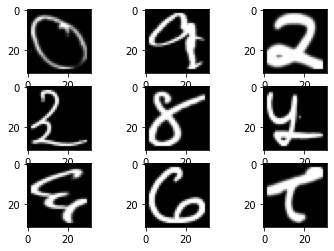

In [84]:
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X[i*1700], pyplot.get_cmap('gray'))
pyplot.show()

In [85]:
Y=np.array(list([x]*1700 for x in range(10)))

In [86]:
Y=Y.reshape(17000,)
Y

array([0, 0, 0, ..., 9, 9, 9])

In [87]:
X = X.reshape((X.shape[0],1024,1))
Y = to_categorical(Y)
print(X.shape, Y.shape)

(17000, 1024, 1) (17000, 10)


In [88]:
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [89]:
trainX,testX,trainy,testy=train_test_split(X,Y,test_size=0.25,random_state=32)
print(trainX.shape, trainy.shape)
print(testX.shape, testy.shape)

(12750, 1024, 1) (12750, 10)
(4250, 1024, 1) (4250, 10)


In [90]:
trainX=trainX/255.0
testX=testX/255.0

In [106]:
model = Sequential()
# model.add(Flatten())
model.add(Dense(10,activation='relu',input_shape=(1024,1)))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(trainX,trainy,epochs=100)

Epoch 1/100


ValueError: ignored

In [93]:
x=3
acc=[]
his=[]
input_dim = trainX.shape
while x<11:
    model = Sequential()
    model.add(layers.Dense(pow(2,x), input_dim=(1024), activation='relu'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    his.append(model.fit(trainX,trainy,epochs=100,batch_size=10))
    acc.append(model.evaluate(testX,testy)[1])
    x+=1

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 8)                 8200      
Total params: 8,200
Trainable params: 8,200
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


ValueError: ignored